In [1]:
import matplotlib.pyplot as plt
import os
from IPython import display

SAVE_FIGURES = False # save figures for latex
DISPLAY_FIGURES = True # display figures in notebook
saved_figures = []

class Figure:
    def __init__(self, title, xlabel, ylabel, x, ys, legends, filename):
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        for y in ys:
            plt.plot(x,y)
        plt.legend(legends, loc = "best", frameon = False)
        self.filename = filename
        self.save_figure_or_continue()
    def save_figure_or_continue(self):
        plt.show
        if DISPLAY_FIGURES: 
            plt.savefig(self.filename + ".png", bbox_inches = "tight")
            saved_figures.append(self.filename + ".png")
        if SAVE_FIGURES: plt.savefig("../latex/figures/" + self.filename + ".png", bbox_inches = "tight")
        plt.close()

def display_figures():
    """ A utility to display saved figures inside this notebook
    """
    filelist=os.listdir()
    for file in saved_figures:
        display.display(display.Image(file))

def delete_figures():
    """ A utility to delete saved figures
    """
    for file in saved_figures:
        os.remove(file)
        saved_figures.remove(file)

In [2]:
''' Policy Iteration Algorithm vs Random Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from random_agent import RandomAgent

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
print("Running Policy Iteration algorithm for Random Agent...")
pi_random_agent = PolicyIterationAgent(env.np_random, False, random_agent)
env.set_agents([
    pi_random_agent,
    random_agent,
])

num_of_games = 10**7
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)

import json
import os

with open(os.path.dirname(os.path.abspath(''))+'\\python\\pi_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")

Running Policy Iteration algorithm for Random Agent...
converged after 3 iterations
Running  100000  games "Policy Iteration Agent vs Random Agent"...
100.0 % complete complete % complete % complete
Average payoffs:   0.8788
Stored results successfully!


In [3]:
''' Policy Iteration Algorithm vs Threshold Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from threshold_agent import ThresholdAgent

# Make environment
env = Env()
threshold_agent = ThresholdAgent(False)
print("Running Policy Iteration algorithm for Threshold Agent...")
pi_threshold_agent = PolicyIterationAgent(env.np_random, False, threshold_agent)
env.set_agents([
    pi_threshold_agent,
    threshold_agent,
])

num_of_games = 10**7
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Threshold Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)

import json
import os

with open(os.path.dirname(os.path.abspath(''))+'\\python\\pi_threshold_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")

Running Policy Iteration algorithm for Threshold Agent...
converged after 3 iterations
Running  100000  games "Policy Iteration Agent vs Threshold Agent"...
100.0 % complete
Average payoffs:   0.22647
Stored results successfully!


In [4]:
''' Q Learning Algorithm vs Threshold Agent
'''

from env import Env
from q_learning_agent import QLearningAgent
from threshold_agent import ThresholdAgent

# Make environment
env = Env()
threshold_agent = ThresholdAgent(False, False)
print("Running Q Learning algorithm for Threshold Agent...")
q_learning_agent = QLearningAgent(env.np_random, False, is_learning = True, slow_decay = False)
env.set_agents([
    q_learning_agent,
    threshold_agent,
])

num_of_games = 10**7
agent_payoffs = []
print("Running ", num_of_games, " games \"Q Learning Agent vs Threshold Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")

    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)
print("Storing trained model...")

import json
import os
with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_threshold_model.json', 'w') as json_file:
    json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)
print("Stored trained model successfully!")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_threshold_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

Running Q Learning algorithm for Threshold Agent...
Running  100000  games "Q Learning Agent vs Threshold Agent"...
100.0 % complete complete % complete
Average payoffs:   -0.03979
Storing trained model...
Stored trained model successfully!


Running Q Learning algorithm for Random Agent...
Loading Optimal Policy for Random Agent...
Running  100000  games "Q Learning Agent vs Random Agent"...
100.0 % complete
Average payoffs:   0.66025
Storing trained model...
Stored results successfully!


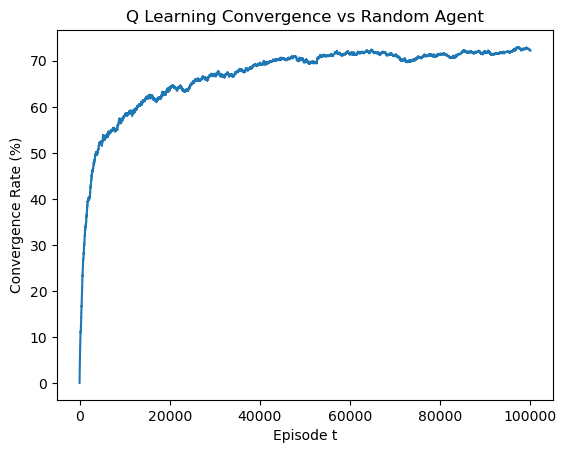

In [5]:
''' Q Learning Algorithm vs Random Agent
'''

from env import Env
from q_learning_agent import QLearningAgent
from random_agent import RandomAgent
import json
import os

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
print("Running Q Learning algorithm for Random Agent...")
q_learning_agent = QLearningAgent(env.np_random, False, is_learning = True, slow_decay = True)
env.set_agents([
    q_learning_agent,
    random_agent
])


## File that includes optimal policy for Random Agent by Policy Iteration algorithm, created by running get_probabilities.py and get_optimal_policies.py files
print("Loading Optimal Policy for Random Agent...")
with open(os.path.dirname(os.path.abspath(''))+'\\python\\random_agent_optimal_policy.json') as json_file:
    random_optimal_policy = json.load(json_file)

num_of_games = 10**7
agent_payoffs = []
q_policy_evolution = []
print("Running ", num_of_games, " games \"Q Learning Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])
    counter = 0
    for state_key in q_learning_agent.model['policy']:
        if q_learning_agent.model['policy'][state_key] == random_optimal_policy[state_key]:
            counter += 1
    q_policy_evolution.append(round(100*counter/len(random_optimal_policy), 2))

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)
print("Storing trained model...")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_model.json', 'w') as json_file:
    json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_policy_evolution.json', 'w') as json_file:
    json.dump(q_policy_evolution, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")

Figure(
    title = "Q Learning Convergence vs Random Agent",
    xlabel = "Episode t",
    ylabel = "Convergence Rate (%)",
    x = range(1,num_of_games+1),
    ys = [q_policy_evolution],
    legends = (""),
    filename = "convergence_rate"
)

###########################################################
# Load generated figures & clean folder
########################################################### 

if DISPLAY_FIGURES: 
    display_figures()
    delete_figures()